**Datasets can be downloaded from https://www.dropbox.com/sh/qwjkllskgn15cu9/AACi-9L38hFiAxkhQES7YrYsa?dl=0**  
Ref: Nestorowa, S. et al. A single-cell resolution map of mouse hematopoietic stem and progenitor cell differentiation. Blood 128, e20-31 (2016).

#### In this tutorial, we create a simple bifurcation event by removing LMPP cells from the full `data_Nestorowa.tsv`. Here we illustrate how STREAM infers trajectory on a 2D plane

In [1]:
%matplotlib inline

In [2]:
import stream as st

In [3]:
st.__version__

'0.4.1'

### Read in data

In [4]:
adata=st.read(file_name='./data_Nestorowa_subset.tsv.gz',workdir='./stream_result')

Saving results in: ./stream_result


> To load and use 10x Genomics single cell RNA-seq data processed with Cell Ranger:  
(Make sure **'genes.tsv'** and **'barcodes.tsv'** are under the same folder as **'matrix.mtx'**)  
```python
adata=st.read(file_name='./filtered_gene_bc_matrices/hg19/matrix.mtx',file_format='mtx')
```

> If the Anndata object is already created, to run STREAM, simply specify the experiment type and work directory:
```python
adata.uns['experiment'] = 'rna-seq'
st.set_workdir(adata,'./result_stream')
```

#### read in cell labels and label color

In [5]:
st.add_metadata(adata,file_name='./metadata_subset.tsv.gz')

> Alternatively, the step can be divided into two step:
```python
st.add_cell_labels(adata,file_name='./cell_label_subset.tsv.gz')
st.add_cell_colors(adata,file_name='./cell_label_color_subset.tsv.gz')
```

In [6]:
adata.obs.head()

,label,label_color
HSPC_025,MPP,#eea113
HSPC_031,MPP,#eea113
HSPC_037,MPP,#eea113
LT-HSC_001,HSC,#40bdbd
HSPC_001,MPP,#eea113


> **Note**: if cell label file or cell color file is not provided, users need to run:  
`st.add_cell_labels(adata) #'unknown' will be added as the default label for all cells` 
`st.add_cell_colors(adata) #'random color will be generated for each cell label  `

#### Other useful preprocessing steps when dealing with raw-count data

Normalize gene expression based on library size  
`st.normalize_per_cell(adata)`

Logarithmize gene expression  
`st.log_transform(adata)` 

Remove mitochondrial genes  
`st.remove_mt_genes(adata)`

Filter out cells  
`st.filter_cells(adata)` 

Filter out genes

In [7]:
st.filter_genes(adata,min_num_cells = 5)

Filter genes based on min_num_cells
After filtering out low-expressed genes: 
1410 cells, 4759 genes


**check parameters**  
`st.select_variable_genes?`

Please check if the blue curve fits the points well.  
If not, please adjust the parameter **'loess_frac'** (By default, `loess_frac=0.01`) until the blue curve fits well.   

476 variable genes are selected


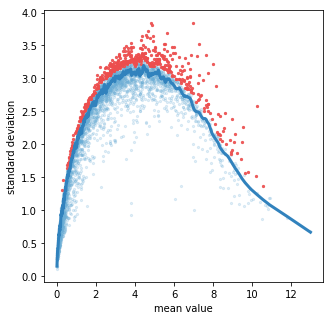

In [8]:
st.select_variable_genes(adata,loess_frac=0.01, percentile=90)

**Note: Alternatively, user can also select top  principal components using all genes or variable genes:**
- use all genes   
`st.select_top_principal_components(adata,n_pc=15,first_pc=True)`
- use variable genes   
    - users need to first run `st.select_variable_genes(adata,loess_frac=0.01, n_genes=2000)`  
    - `st.select_top_principal_components(adata,feature='var_genes',n_pc=15,first_pc=True)`

**check parameters**  
`st.dimension_reduction?`

Tips:

>Several alternative dimension reduction methods are also supported, `mlle`(modified locally linear embedding),`se`(spectral embedding), `umap`, `pca`. From `STREAM v4.0`, by default, `method ='se'`.  

In [9]:
st.dimension_reduction(adata,n_neighbors=100,n_components=2,n_jobs=4)

feature var_genes is being used ...
4 cpus are being used ...


> Alternatively, using top principal components as features:
`st.dimension_reduction(adata,method='se',feature='top_pcs',n_neighbors=30, n_components=2)`

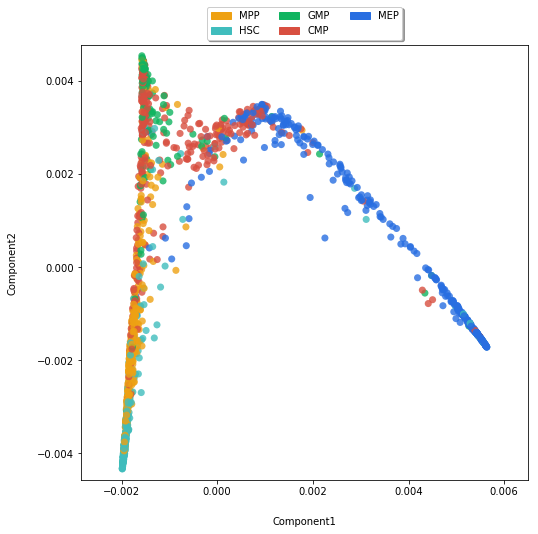

In [10]:
st.plot_dimension_reduction(adata)

**check parameters**  
`st.seed_elastic_principal_graph?`

In [11]:
st.seed_elastic_principal_graph(adata,n_clusters=10)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 10
Calculatng minimum spanning tree...
Number of initial branches: 3


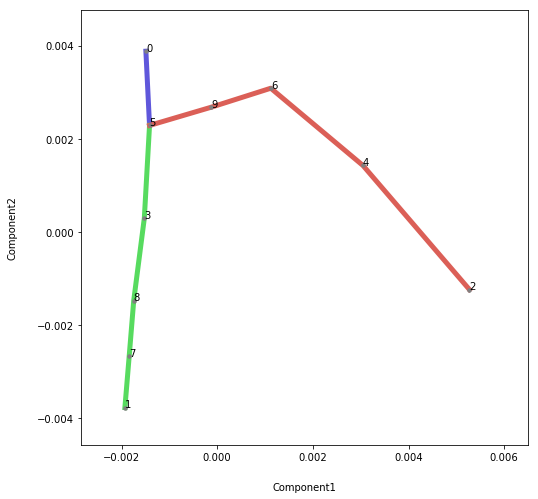

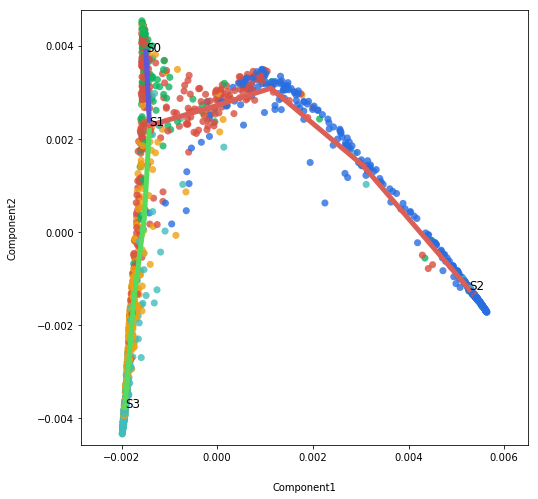

In [12]:
st.plot_branches(adata)
st.plot_branches_with_cells(adata,fig_legend=False)

**check parameters**  
`st.elastic_principal_graph?`

> `epg_alpha`, `epg_mu`, `epg_lambda` are the three most influential parameters for learning elastic principal graph.  
- `epg_alpha`: penalizes spurious branching events. **The larger, the fewer branches the function will learn**. (by default, `epg_alpha=0.02`)
- `epg_mu`: penalizes the deviation from harmonic embedding, where harmonicity assumes that each node is the mean of its neighbor nodes. **The larger, the more edges the function will use to fit into points(cells)** (by default, `epg_mu=0.1`) 
- `epg_lambda`: penalizes the total length of edges. **The larger, the 'shorter' curves the function will use to fit into points(cells)** and the fewer points(cells) the curves will reach. (by default, `epg_lambda=0.02`)

Tips:  

- Add **'epg_trimmingradius'** can help get rid of noisy points (by defalut `epg_trimmingradius=Inf`)   
e.g. `st.elastic_principal_graph(adata,epg_trimmingradius=0.1)`  

In [13]:
st.elastic_principal_graph(adata,epg_alpha=0.02,epg_mu=0.1,epg_lambda=0.02)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 1410 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1||50
	
1.624e-07
	
50
	
49
	
46
	
1
	
0
	
0
	
3.656e-08
	
2.904e-08
	
0.9974
	
0.998
	
1.201e-07
	
5.791e-09
	
2.895e-07
	
1.448e-05
	
0


8.413 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 3


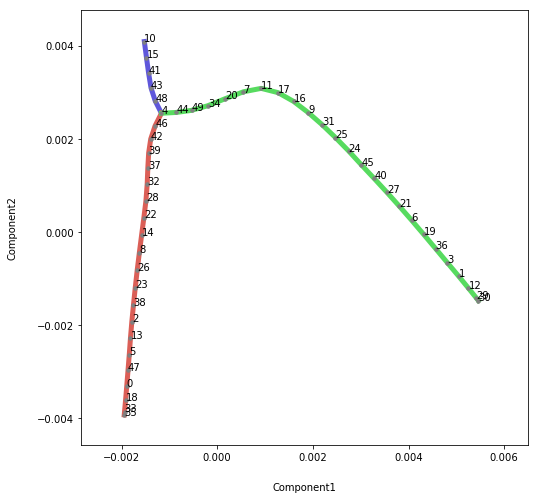

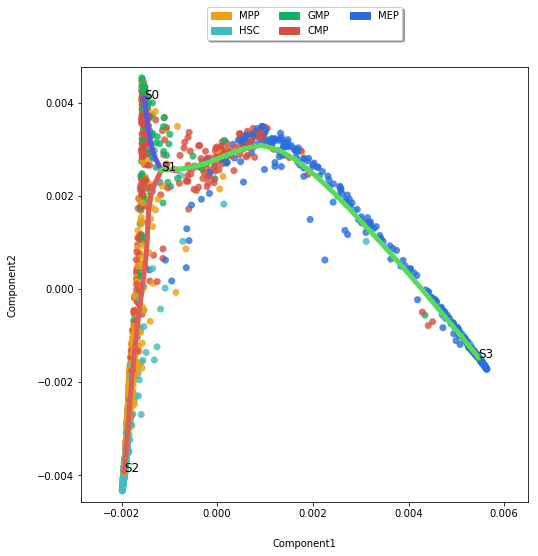

In [14]:
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

Tips:  
- Add **'epg_trimmingradius'** will help get rid of noisy points (by defalut `epg_trimmingradius=Inf`)   
e.g. `st.optimize_branching(adata,epg_trimmingradius=0.1)`  

Optimizing branching...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 80 nodes on 1410 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
50
 
51
 
52
 
53
 
54
 
55
 
56
 
57
 
58
 
59
 
60
 
61
 
62
 
63
 
64
 
65
 
66
 
67
 
68
 
69
 
70
 
71
 
72
 
73
 
74
 
75
 
76
 
77
 
78
 
79
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1||80
	
7.661e-08
	
80
	
79
	
76
	
1
	
0
	
0
	
2.639e-08
	
2.159e-08
	
0.9981
	
0.9985
	
4.592e-08
	
4.297e-09
	
3.438e-07
	
2.75e-05
	
0


2.021 sec elapsed

Number of branches after optimizing branching: 3


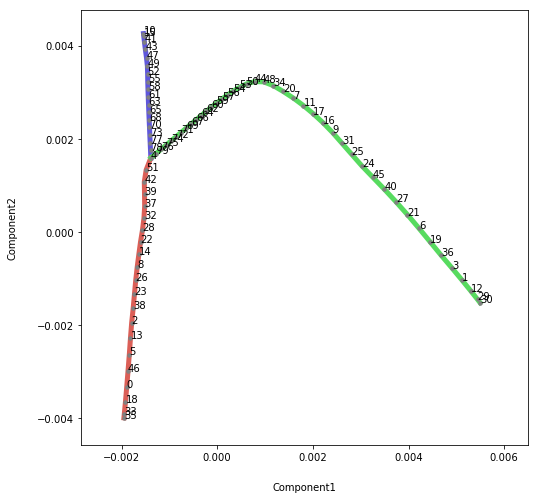

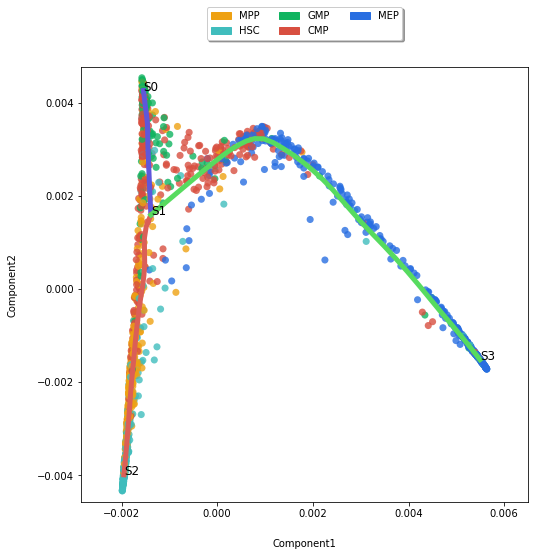

In [15]:
### optional step
st.optimize_branching(adata,epg_alpha=0.02,epg_mu=0.1,epg_lambda=0.01)
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

Other optional steps:

- Prune branches:  
`st.prune_elastic_principal_graph?`  
`st.prune_elastic_principal_graph(adata)`


- Shift branching node:  
`st.shift_branching?`  
`st.shift_branching(adata)`

**check parameters**  
`st.extend_elastic_principal_graph?`  

Tips:  
- Add **'epg_trimmingradius'** will help get rid of noisy points (by defalut `epg_trimmingradius=Inf`)   
e.g. `st.extend_elastic_principal_graph(adata,epg_trimmingradius=0.1)`  

Extending leaves with additional nodes ...
Number of branches after extending leaves: 3


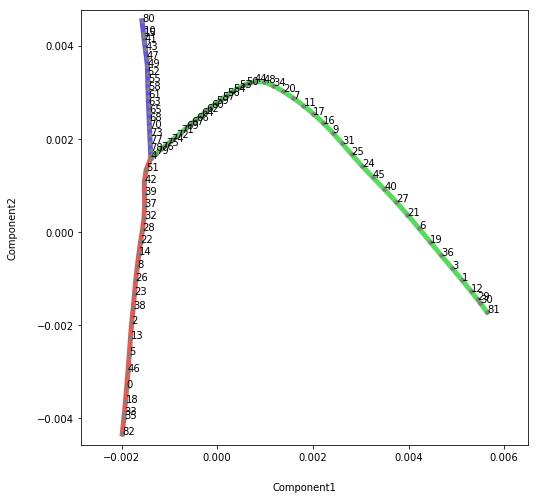

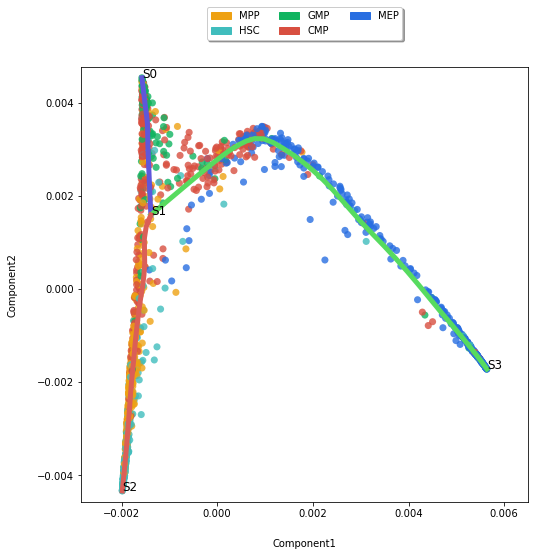

In [16]:
###Extend leaf branch to reach further cells 
st.extend_elastic_principal_graph(adata)
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

/Users/huidong/anaconda3/envs/env_STREAM/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


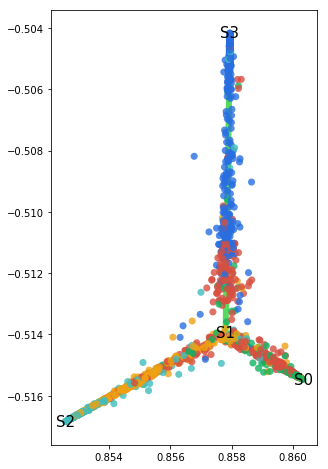

In [17]:
st.plot_flat_tree(adata,fig_legend=False)

**check parameters**  
`st.subwaymap_plot?`

By default **percentile_dist=95**, to make cells more conpact around the branches, try to **increase percentile_dist to beween 95 and 100**

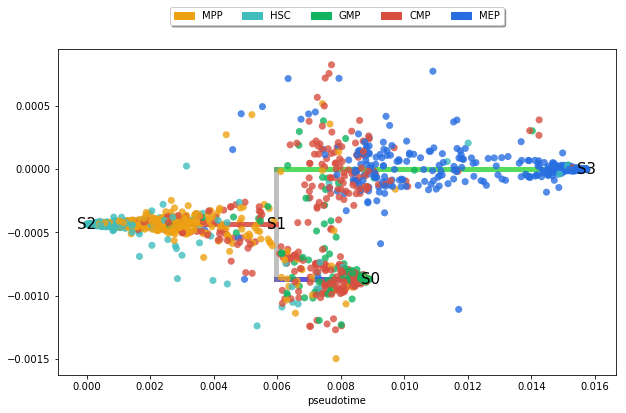

In [18]:
st.subwaymap_plot(adata,root='S2',fig_legend_ncol=5) 

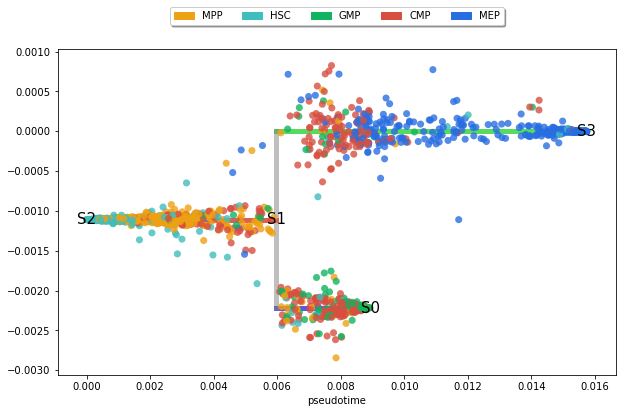

In [19]:
st.subwaymap_plot(adata,root='S2',fig_legend_ncol=5,percentile_dist=100) 

**check parameters**  
`st.stream_plot?`

* By default **factor_min_win=2.0** , lowering it (between 1.0 and 2.0) can make a smoother stream plot
* By default **factor_num_win=10** (the number of sliding windows), increasing it (between 10 and 20) can make a finer stream plot

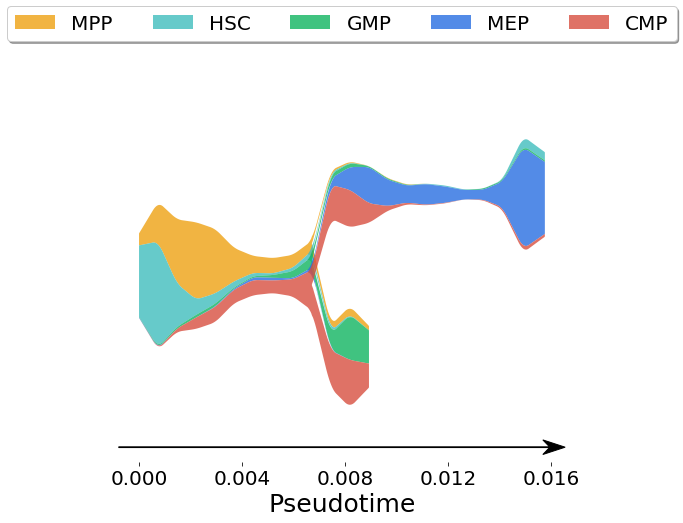

In [20]:
st.stream_plot(adata,root='S2',fig_legend_ncol=5,fig_size=(8,8))

adjust font size

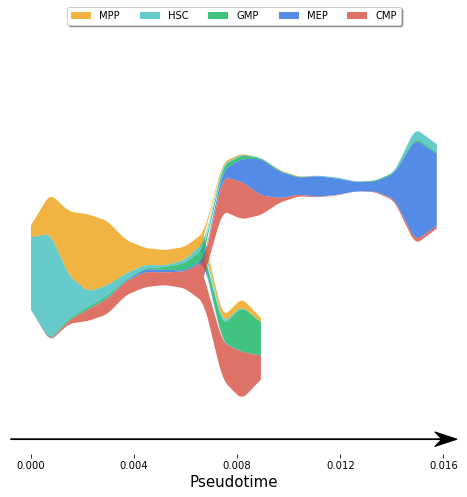

In [21]:
st.stream_plot(adata,root='S2',fig_legend_ncol=5,fig_size=(8,8),label_fontsize=15,tick_fontsize=10)

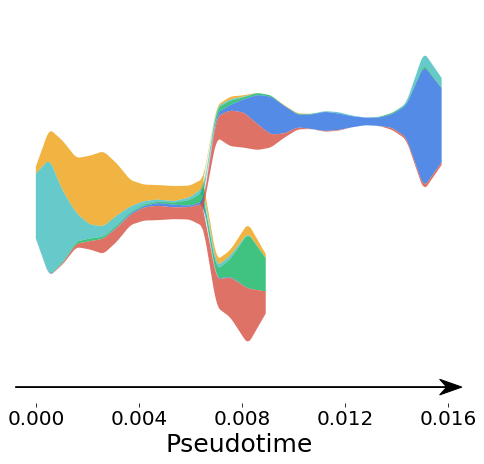

In [22]:
st.stream_plot(adata,root='S2',fig_legend=False,fig_size=(8,8),factor_num_win=15)

The order between **horizontal branches from the same parent node** has no meaning

Users can specify the order preference of nodes themselves by setting the parameter **'preference'**

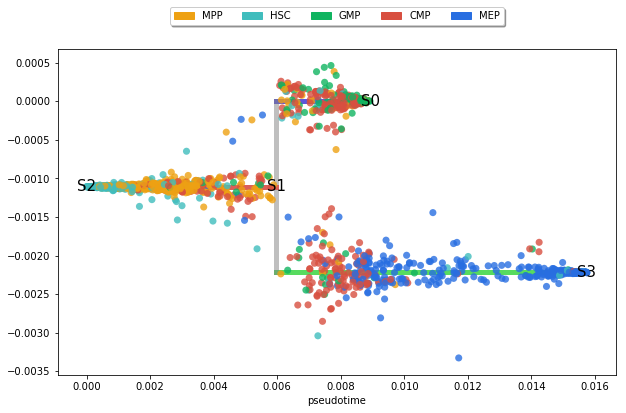

In [23]:
st.subwaymap_plot(adata,percentile_dist=100,root='S2',fig_legend_ncol=6,preference=['S0']) 

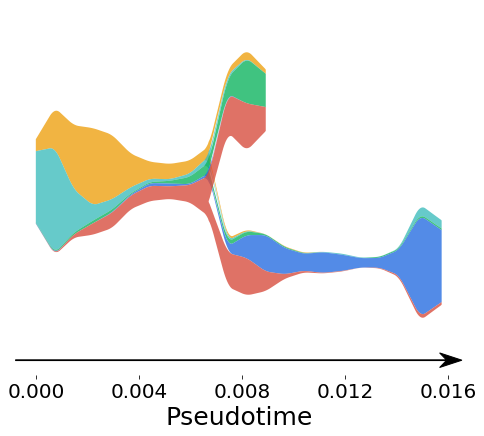

In [24]:
st.stream_plot(adata,root='S2',fig_legend=False,fig_size=(8,8),preference=['S0'])

For stream plot with **'thin branches'**, log2 view of stream plot (by specifying **'flag_log_view=True'**) will help zoom in the thin branches with very few cells by log2 transformation and visualize the composition of cells on the thin branches  
**factor_zoomin**: suggested value 50~200

**This case is best illustrated in tutorial** [4.STREAM_scATAC-seq](https://nbviewer.jupyter.org/github/pinellolab/STREAM/blob/master/tutorial/4.STREAM_scATAC-seq.ipynb)

<img src="./img/log2_view_plots.png" alt="log2_view_plots" width=1000>

#### Visualize genes

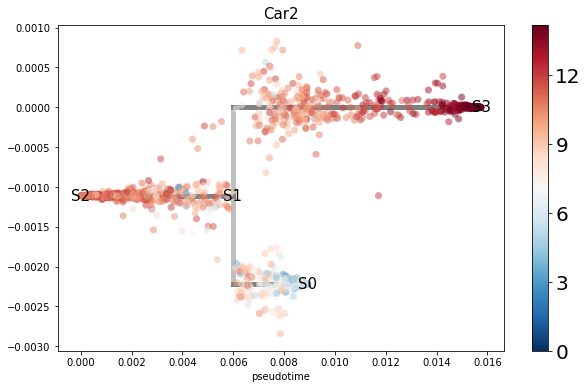

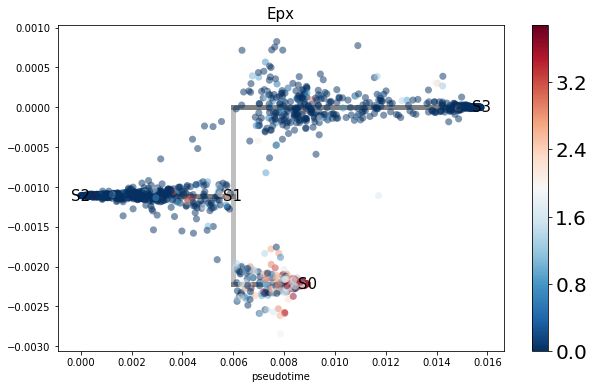

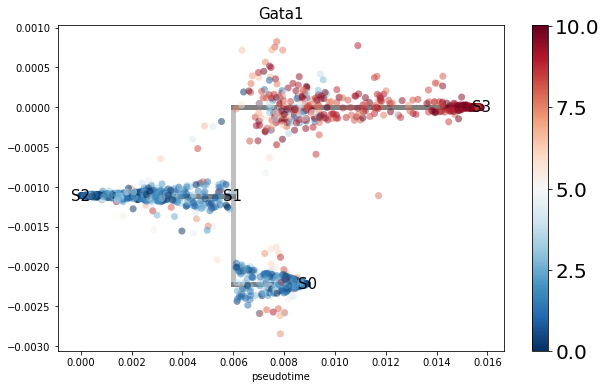

In [25]:
st.subwaymap_plot_gene(adata,percentile_dist=100,root='S2',genes=['Gata1','Car2','Epx']) 

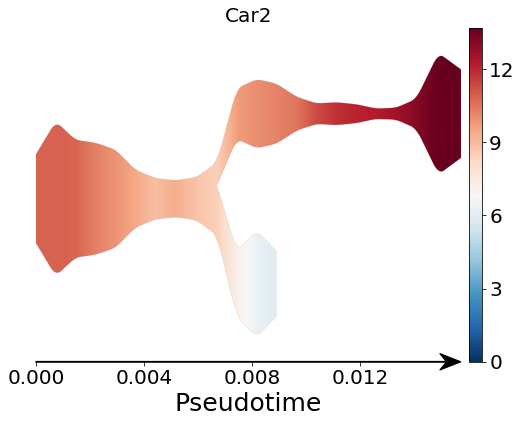

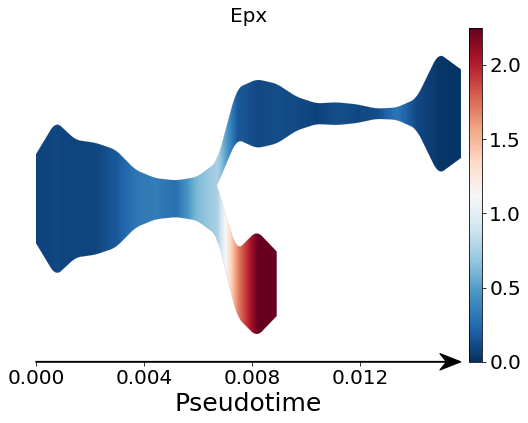

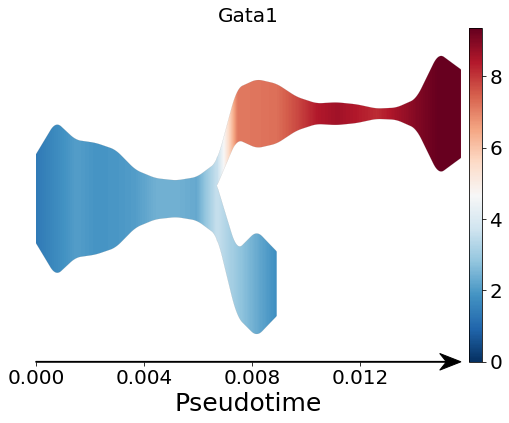

In [26]:
st.stream_plot_gene(adata,root='S2',fig_size=(8,8),genes=['Gata1','Car2','Epx'])

**Marker gene detection part is a bit time-consuming, so please make sure the struture learned from previous steps is reasonble before running any maker gene detection steps**

**Also it's not always necessary to execute all three marker gene detection parts. Running one of them might be adequate already.**

#### 1.Detect marker genes for each leaf branch

**'preference'** is only used to adjust the order of comparions (in coordance with subway_map plot and stream plot), it will not affect the final detected genes

In [27]:
st.detect_leaf_genes(adata,root='S2',cutoff_zscore=1.0)

Filtering out genes that are expressed in less than 5 cells ...
1 cpus are being used ...
4767 genes are being scanned ...


In [28]:
adata.uns['leaf_genes_all'].head()

,zscore,H_statistic,H_pvalue,S2S1_pvalue,S1S3_pvalue,S1S0_pvalue
Mfsd2b,1.413791,925.608950,1.015244e-201,9.290695e-304,1.000000e+00,1.593337e-214
Atpif1,1.217145,906.597663,1.364014e-197,2.030898e-315,1.000000e+00,5.278843e-67
Gata1,1.412871,844.261247,4.688130e-184,6.461421e-260,1.000000e+00,5.129817e-176
Cks2,-1.389124,842.066438,1.404741e-183,1.000000e+00,6.145635e-268,1.813293e-129
Klf1,1.414212,809.366289,1.771509e-176,4.055995e-237,1.000000e+00,4.393024e-173


In [29]:
adata.uns['leaf_genes'].keys()

dict_keys([('S2', 'S1'), ('S1', 'S3'), ('S1', 'S0')])

leaf branch S1_S3 genes

In [30]:
adata.uns['leaf_genes'][('S1','S3')]

,zscore,H_statistic,H_pvalue,S2S1_pvalue,S1S3_pvalue,S1S0_pvalue
Mfsd2b,1.413791,925.608950,1.015244e-201,9.290695e-304,1.0,1.593337e-214
Atpif1,1.217145,906.597663,1.364014e-197,2.030898e-315,1.0,5.278843e-67
Gata1,1.412871,844.261247,4.688130e-184,6.461421e-260,1.0,5.129817e-176
Klf1,1.414212,809.366289,1.771509e-176,4.055995e-237,1.0,4.393024e-173
Lcp1,-1.411097,792.229521,9.322777e-173,1.409894e-220,1.0,4.043952e-180
...,...,...,...,...,...,...
Trim36,-1.410046,12.218034,2.222735e-03,4.732873e-03,1.0,4.732873e-03
Fam135a,-1.406862,11.950643,2.540685e-03,5.104397e-03,1.0,5.104397e-03
Gm15963,1.172147,11.905044,2.599277e-03,6.499202e-03,1.0,6.499202e-03
Idua,1.390789,11.320104,3.482336e-03,6.346856e-03,1.0,6.346856e-03


#### 2.Detect transition gene for each branch

In [31]:
st.detect_transistion_genes(adata,root='S2')

Importing precomputed scaled gene expression matrix ...
4767 genes are being scanned ...


In [32]:
adata.uns['transition_genes'].keys()

dict_keys([('S2', 'S1'), ('S1', 'S3'), ('S1', 'S0')])

In [33]:
adata.uns['transition_genes'][('S2','S1')].head()

,stat,logfc,pval,qval
Plac8,0.767781,1.320988,6.517166e-124,1.994904e-120
Pdzk1ip1,-0.699310,1.619044,6.308763e-94,9.655562e-91
H2afy,0.697701,0.531877,2.521542e-93,2.572814e-90
Ifitm1,-0.631137,0.399613,1.577686e-71,1.207324e-68
Cdk6,0.628820,0.761195,7.270338e-71,4.450901e-68


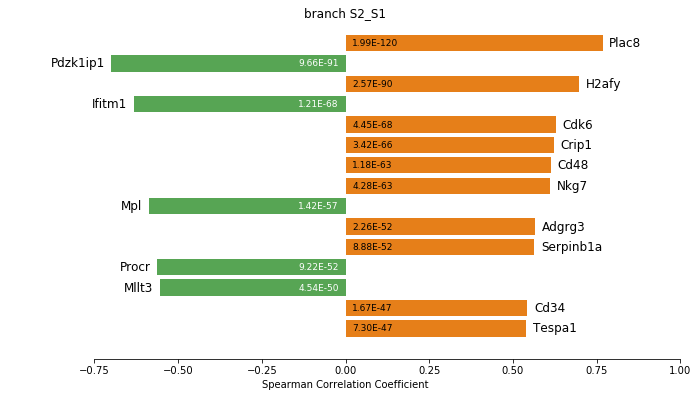

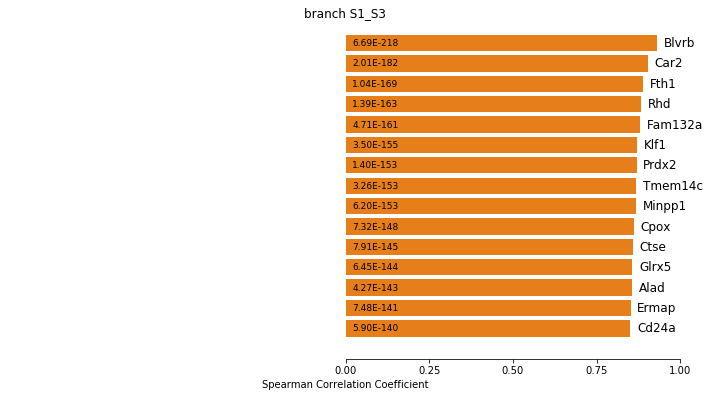

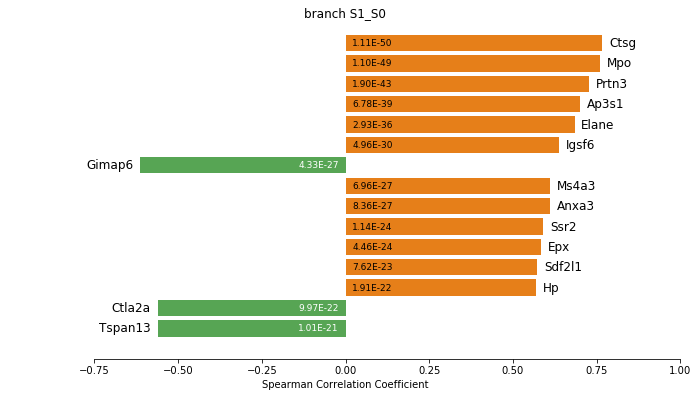

In [34]:
st.plot_transition_genes(adata)

#### 3.Detect differentially expressed genes between pairs of branches

In [35]:
st.detect_de_genes(adata,root='S2')

Importing precomputed scaled gene expression matrix ...
4767 genes are being scanned ...


In [36]:
adata.uns['de_genes_greater'].keys()

dict_keys([(('S2', 'S1'), ('S1', 'S3')), (('S2', 'S1'), ('S1', 'S0')), (('S1', 'S3'), ('S1', 'S0'))])

In [37]:
adata.uns['de_genes_less'].keys()

dict_keys([(('S2', 'S1'), ('S1', 'S3')), (('S2', 'S1'), ('S1', 'S0')), (('S1', 'S3'), ('S1', 'S0'))])

* Genes that are highly expressed on branch **S1_S3** when comparing branch S1_S3 and branch S1_S0

In [38]:
adata.uns['de_genes_greater'][(('S1', 'S3'), ('S1', 'S0'))].head()

,z_score,U,logfc,mean_up,mean_down,pval,qval
Mfsd2b,22.506620,136242.0,1.773851,0.865412,0.252457,3.588597e-112,1.040693e-108
Vamp5,21.705087,133841.0,0.757341,0.907302,0.536376,1.843434e-104,1.730891e-101
Car2,21.295453,132616.0,0.794690,0.840741,0.484303,1.255391e-100,3.640635e-98
Gata1,21.131564,132130.5,1.902368,0.829809,0.221369,4.092611e-99,9.890476e-97
Klf1,21.067863,131939.0,1.851140,0.812984,0.224749,1.574062e-98,3.511368e-96


* Genes that are highly expressed on branch **S1_S0** when comparing branch S1_S3 and branch S1_S0

In [39]:
adata.uns['de_genes_less'][(('S1', 'S3'), ('S1', 'S0'))].head()

,z_score,U,logfc,mean_up,mean_down,pval,qval
Mpo,-21.726822,3959.0,1.155047,0.398352,0.888186,1.148708e-104,1.665627e-101
Cd53,-21.693195,4041.0,1.985588,0.210204,0.834933,2.387436e-104,1.730891e-101
Sell,-21.669930,4114.0,1.895105,0.226914,0.846309,3.957905e-104,2.295585e-101
Emb,-21.600727,4320.5,1.714872,0.259292,0.853122,1.774510e-103,8.576800e-101
H2afy,-21.590941,4344.0,0.402985,0.694810,0.919002,2.193079e-103,9.085614e-101


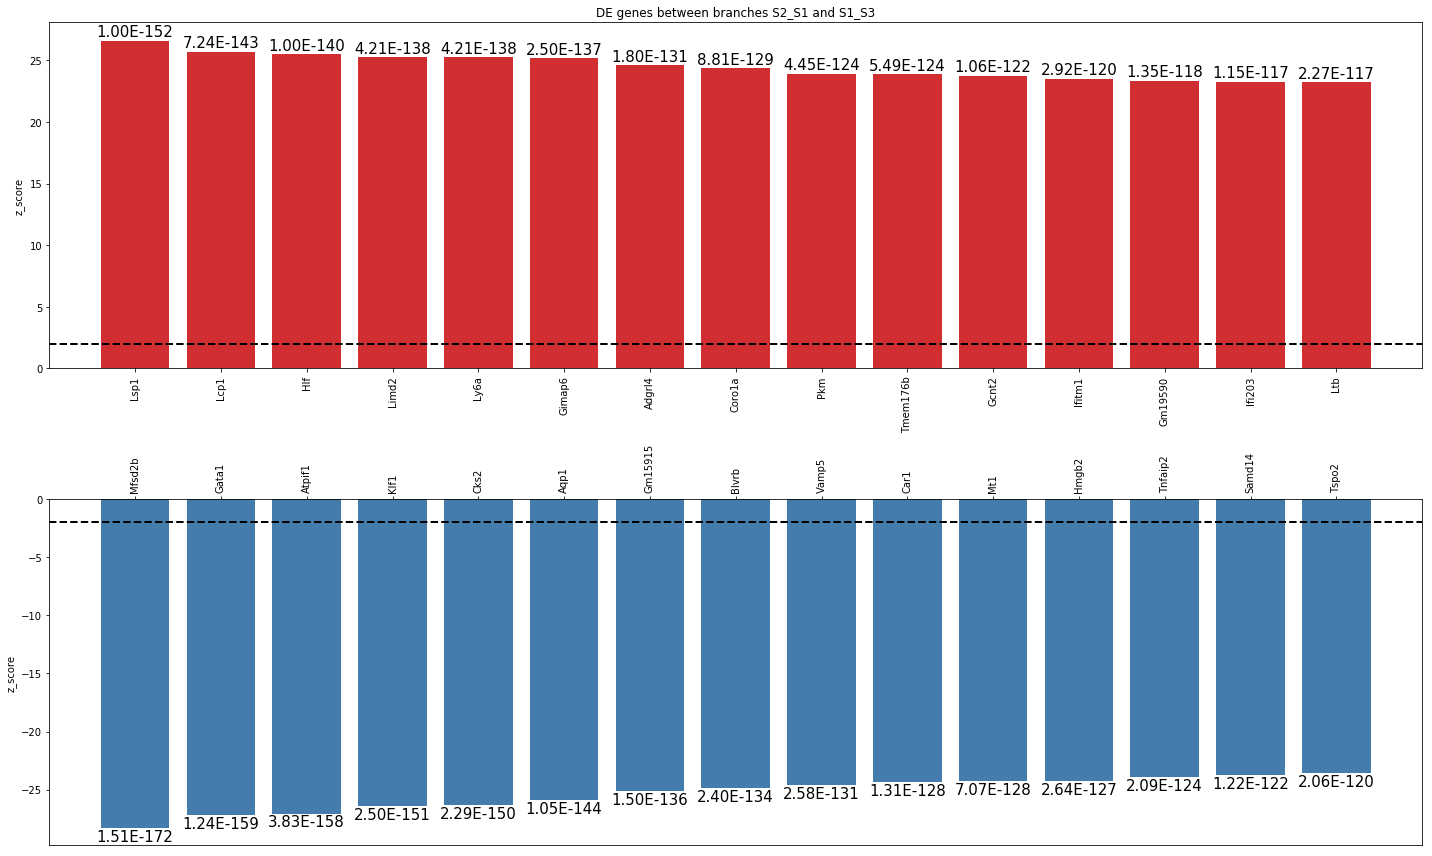

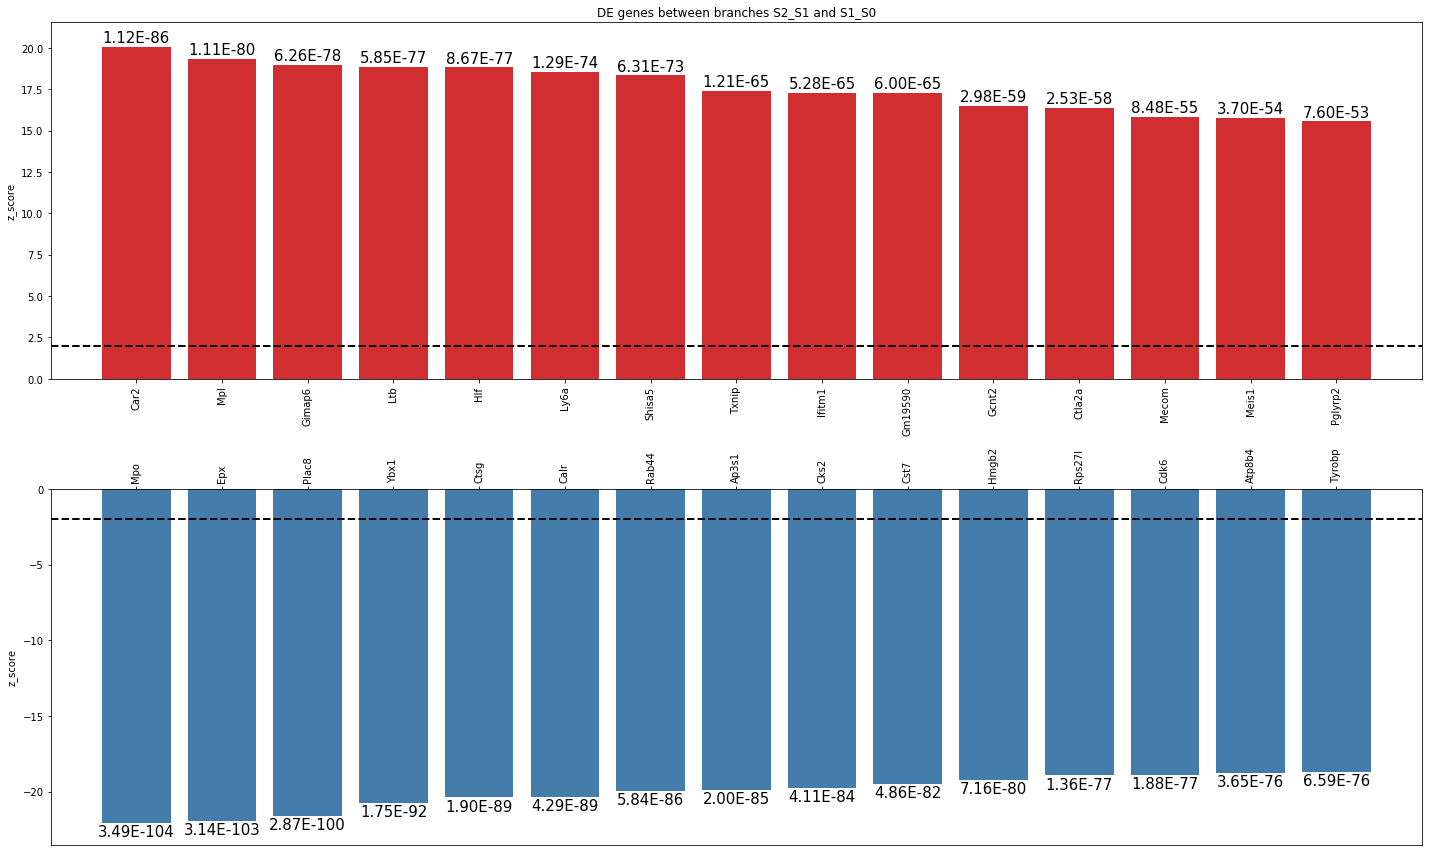

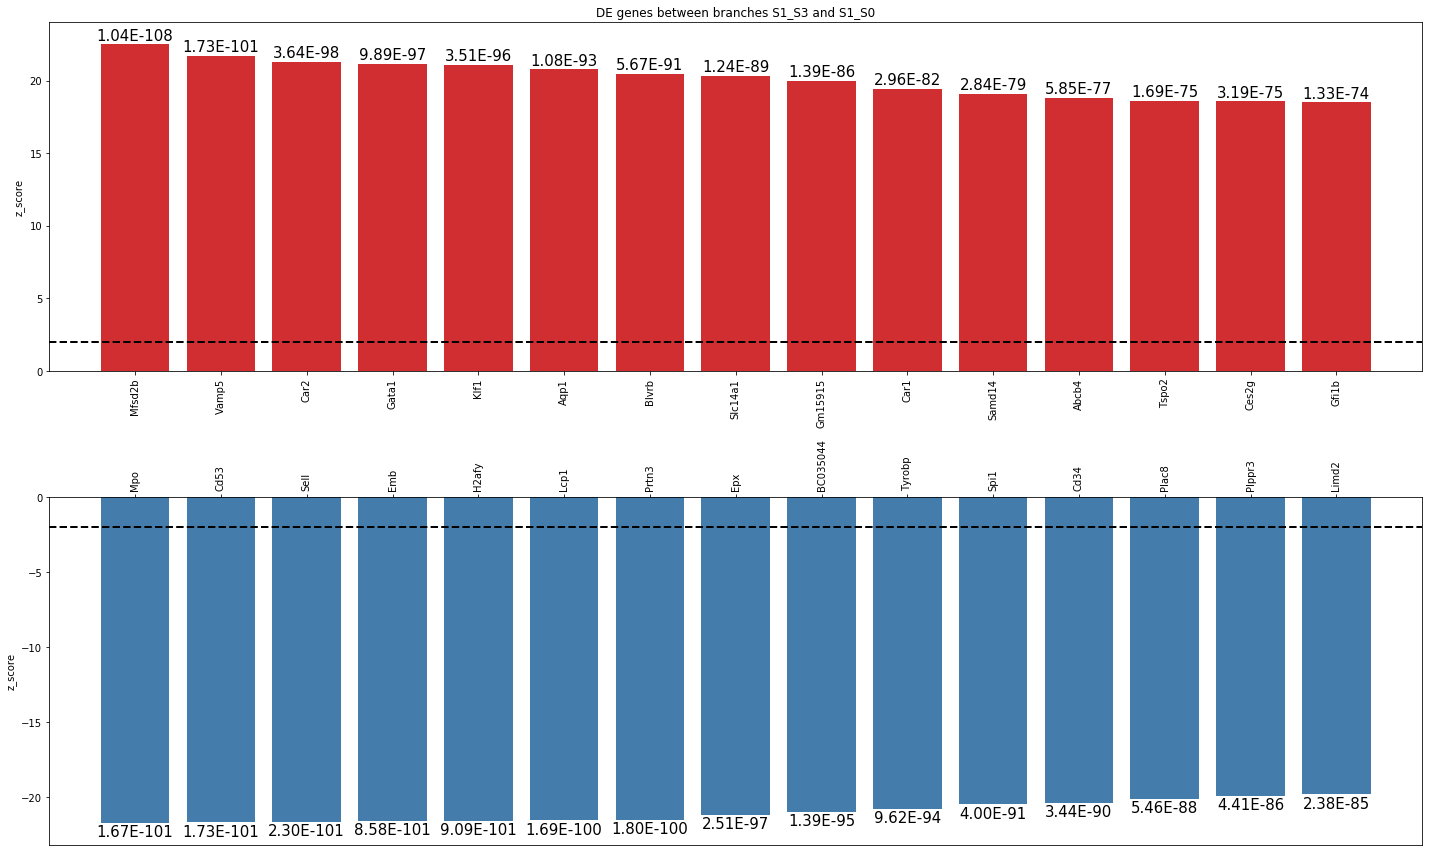

In [40]:
st.plot_de_genes(adata)

In [41]:
adata

AnnData object with n_obs × n_vars = 1410 × 4759 
    obs: 'label', 'label_color', 'node', 'branch_id', 'branch_id_alias', 'branch_lam', 'branch_dist', 'S0_pseudotime', 'S3_pseudotime', 'S2_pseudotime', 'S1_pseudotime'
    var: 'n_counts', 'n_cells'
    uns: 'experiment', 'workdir', 'label_color', 'var_genes', 'trans_se', 'epg', 'flat_tree', 'seed_epg', 'seed_flat_tree', 'ori_epg', 'epg_obj', 'ori_epg_obj', 'subwaymap_S2', 'scaled_gene_expr', 'leaf_genes_all', 'leaf_genes', 'transition_genes', 'de_genes_greater', 'de_genes_less'
    obsm: 'var_genes', 'X_se', 'X_dr', 'X_spring', 'X_subwaymap_S2'

In [42]:
adata.obs.head()

,label,label_color,node,branch_id,branch_id_alias,branch_lam,branch_dist,S0_pseudotime,S3_pseudotime,S2_pseudotime,S1_pseudotime
HSPC_025,MPP,#eea113,38,"(82, 4)","(S2, S1)",0.002780,2.180822e-05,0.006142,0.012966,0.002780,0.003189
HSPC_031,MPP,#eea113,2,"(82, 4)","(S2, S1)",0.002446,5.119959e-07,0.006475,0.013300,0.002446,0.003523
HSPC_037,MPP,#eea113,2,"(82, 4)","(S2, S1)",0.002506,4.133224e-05,0.006416,0.013241,0.002506,0.003464
LT-HSC_001,HSC,#40bdbd,33,"(82, 4)","(S2, S1)",0.000538,1.434895e-05,0.008383,0.015208,0.000538,0.005431
HSPC_001,MPP,#eea113,0,"(82, 4)","(S2, S1)",0.001164,1.538435e-05,0.007758,0.014582,0.001164,0.004805


#### Additionally, STREAM can be also used to detect cell population-specific markers

In [43]:
st.find_marker(adata,ident='label')

Importing precomputed scaled gene expression matrix ...
4767 genes are being scanned ...


In [44]:
adata.uns['markers_label_all'].sort_values(by='zscore',ascending=False)

,zscore,H_statistic,H_pvalue,CMP,GMP,HSC,MEP,MPP
Sphk1,1.9991,390.664,2.89349e-83,1.85808e-67,1.7603e-40,3.35778e-66,-1,5.41031e-66
Minpp1,1.99876,452.455,1.27969e-96,2.13417e-80,5.40882e-52,2.2367e-71,-1,2.36655e-85
Smtnl1,1.99865,69.1812,3.37932e-14,4.86246e-12,2.06241e-07,-1,1.19546e-10,4.86246e-12
Scrn3,1.99845,254.99,5.47746e-54,1.53038e-40,1.61044e-21,5.83339e-37,-1,3.57609e-45
Ermap,1.99812,548.265,2.42841e-117,1.43742e-103,6.00768e-62,9.42246e-100,-1,2.76265e-107
...,...,...,...,...,...,...,...,...
Nbeal2,-1.9866,131.288,2.06533e-27,6.82562e-17,5.10801e-12,2.42269e-20,-1,4.97218e-22
Dock2,-1.98902,118.724,1.00042e-24,1.70743e-16,1.2823e-08,2.15335e-19,-1,2.15335e-19
Zfp260,-1.99083,58.4905,6.02009e-12,2.69478e-07,2.69512e-05,2.37023e-08,-1,7.29769e-11
Tnfrsf13b,-1.99237,187.56,1.7722e-39,3.32348e-26,3.54383e-16,3.95961e-27,-1,1.54058e-33


In [45]:
adata.uns['markers_label'].keys()

dict_keys(['CMP', 'GMP', 'HSC', 'MEP', 'MPP'])

In [46]:
adata.uns['markers_label']['GMP'].head()

,zscore,H_statistic,H_pvalue,CMP,HSC,MEP,MPP
Mpo,1.58537,522.277,1.01741e-111,1.06206e-09,8.76126e-93,6.02634e-77,7.12221e-44
Rab44,1.56648,460.816,1.9926e-98,2.53026e-07,7.46225e-76,8.13263e-57,2.04996e-55
Epx,1.82863,447.402,1.58321e-95,1.80791e-22,4.37857e-76,6.72372e-85,3.24884e-71
Ccl9,1.50141,375.733,4.86183e-80,1.88759e-05,1.55792e-54,8.61088e-53,4.88538e-27
Tyrobp,1.54277,370.074,8.10926e-79,1.16526e-07,2.11998e-52,2.93161e-59,6.00308e-25


#### Save results

save `adata` to `.pkl` file (by default, it's named `stream_result.pkl`)

In [47]:
st.write(adata,file_name='stream_result.pkl')

Read back the saved pkl file
```python
adata = st.read('./stream_result/stream_result.pkl',file_format='pkl',workdir='./stream_result')
```